# Employee Churn Prediction
Employee Churn Prediction is a project to make employee prediction which employee will leave or not using machine learning algorithms. This project only use simple machine learning algorithms that often used.

This dataset is the employee dataset from “Tawfik Elmetwally” from Kaggle site. The dataset contained columns as follows:
*   Education : Employee’s last education
*   JoiningYear : Year joined employee
*   City : City or base employee work
*   PaymentTier : Payment tier category in different tier salary
*   Age : Employee’s age
*   Gender : Employee’s gender
*   EverBenched : Employees have been without work for a certain period
*   ExperiencedInCurrentDomain : Experience in current domain (year)
*   LeaveOrNot : Column target, is employee leave or not

Special thanks to “Tawfik Elmetwally” for providing dataset. Link dataset in Kaggle : https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset











In [1]:
# Download dataset from google drive
!gdown --id 1gK6yHnibkVHullvUAmjiIxuzArJB0qE0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gK6yHnibkVHullvUAmjiIxuzArJB0qE0
To: /content/Employee.csv
100% 195k/195k [00:00<00:00, 30.4MB/s]


In [2]:
# Install catboost model
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.3 MB/s eta 0:00:00


In [3]:
# Import all library needed in the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
# Read csv file and showing 5 first data
df = pd.read_csv('Employee.csv')
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


From dataset info, we get columns informations. Dataset have 9 columns, 4653 rows and have object, int64 data type.

## EDA

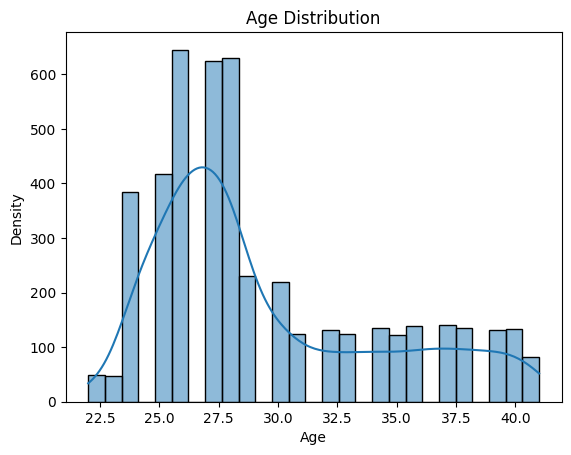

In [6]:
# Create histogram plot to show age employee distribution
sns.histplot(df['Age'], kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()

Age distribution employees dominated by 26-28 years old.

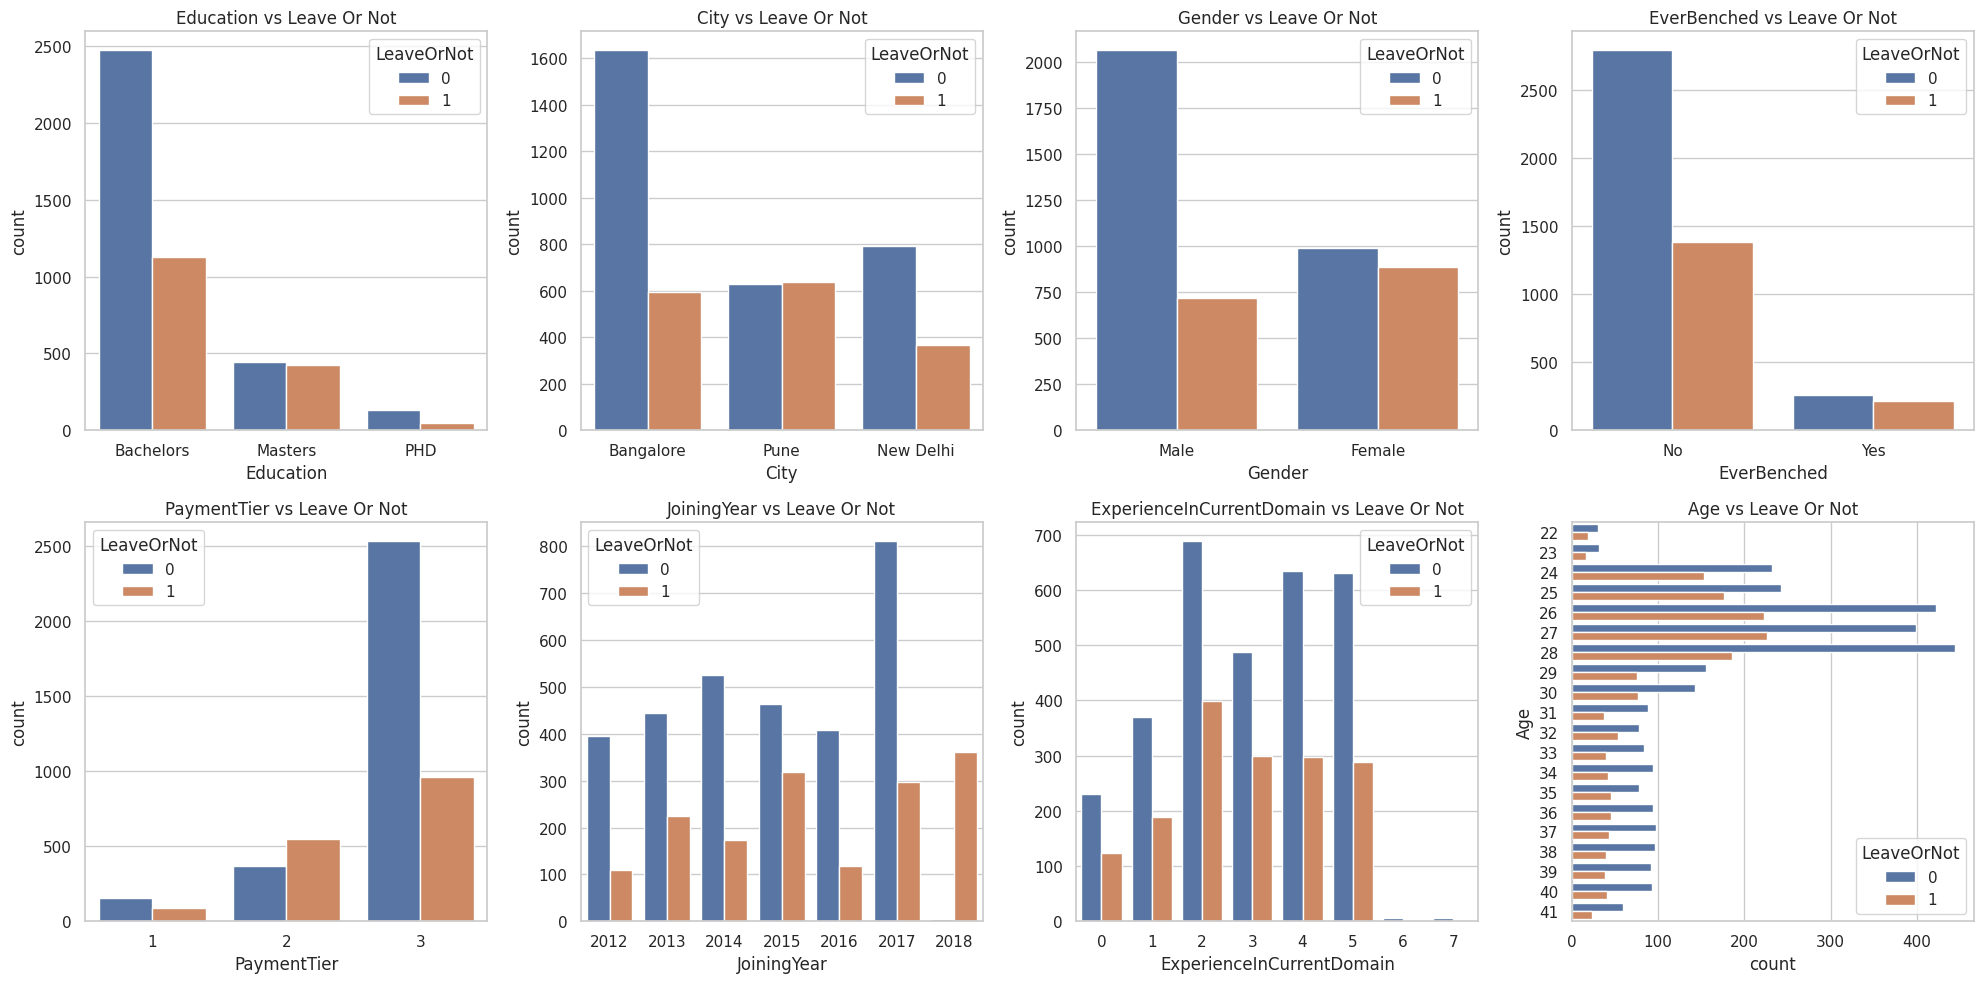

In [7]:
# Create plots to show all column vs target column

sns.set(style="whitegrid")

# Create bar plots for categorical columns with respect to 'LeaveOrNot'
categorical_columns = ['Education', 'City', 'Gender', 'EverBenched', 'PaymentTier', 'JoiningYear', 'ExperienceInCurrentDomain', 'Age']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, col in enumerate(categorical_columns):
  row = i // 4
  col_position = i % 4
  if i < 7:
    # Create vertical count plot
    sns.countplot(data=df, x=col, hue='LeaveOrNot', ax=axes[row, col_position], )
    axes[row, col_position].set_title(f'{col} vs Leave Or Not')
  else:
    # Create horizontal count plot
    sns.countplot(data=df, y = col, hue='LeaveOrNot', ax=axes[row, col_position], orient='h', )
    axes[row, col_position].set_title(f'Age vs Leave Or Not')

plt.tight_layout()
plt.show()

From the plots we got the informations :
1. Employees who leave mostly have a bachelor's degree, but when calculated by ratio, employees with a master’s degree leave the company more often.
2. Pune is the city with the highest number of employees leaving.
3. The Employees who leave are mostly women.
4. Employees who have ever been benched tend to stay with the company.
5. Employees with a tier 2 payment level tend to leave.
6. 2017 is the year with the lowest turnover, while 2018 is the year with the highest turnover.
7. Employees with 2 or 3 years of experience in their current field tend to leave the company.
8. Employees aged 24-28 tend to leave most frequently.







In [8]:
# Encode object feature to get correlation and to create machine learning model
# Define replacement dictionary
replacements = {
    'Education': {'Bachelors': '0', 'Masters': '1', 'PHD': '2'},
    'City': {'Bangalore': '0', 'Pune': '1', 'New Delhi': '2'},
    'Gender': {'Male': '1', 'Female': '0'},
    'EverBenched': {'No': '0', 'Yes': '1'}
}

# Replace values
df.replace(replacements, inplace=True)

In [9]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,2,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1


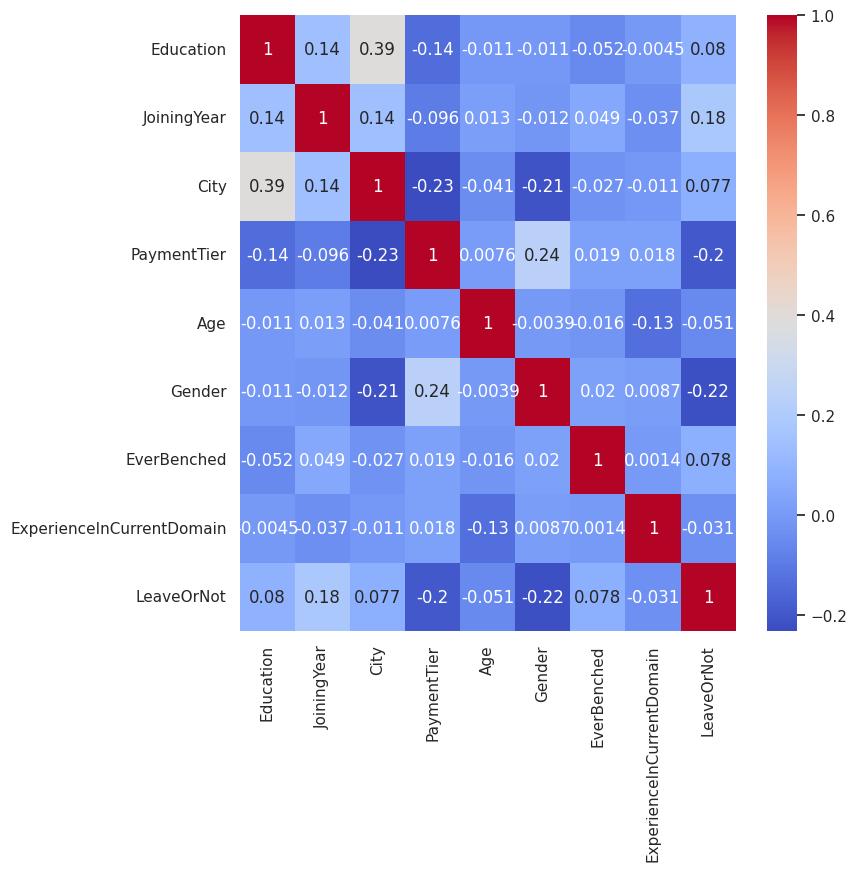

In [10]:
# Plot correlation heatmap
df_corr = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(data=df_corr, cmap='coolwarm', annot=True)
plt.show()

From the correlation map, there are no high values among the columns. The highest positive correlation is between city and education, while the highest negative correlation is between payment tier and city. The correlations indicate that there is no linear relationship in any of the data features.

## Create Prediction Model

In [11]:
# Split data into input and target data
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

# Standardize input data
X = StandardScaler().fit_transform(X)

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Machine learning model would be choose are as follows:
1. Logistic Regression
    - Pros :
      - Simple model, easy to interpret.
      - Well-suited for binary classification tasks.
    - Cons :
      - Not suitable for complex or high-dimensional data.
      - Limited to linear relationships; not effective for non-linear cases.
2. Decision Tree
    - Pros :
      - Handles both numerical and categorical features.
      - Suitable for capturing non-linear relationships.
      - Easy to interpret.
    - Cons :
      - Prone to overfitting if not properly pruned.
      - Sensitive to small changes in data.
      - Limited scalability and struggles with very complex datasets.
3. Support Vector Machine (SVM)
    - Pros :
      - Handles high-dimensional data effectively.
      - Can model both linear and non-linear relationships.
    - Cons :
      - Computationally intensive on large datasets.
      - Requires careful tuning of parameters, which can be complex.
4. XGBoost
    - Pros :
      - High accuracy, especially with large datasets.
      - Can handle missing values automatically.
      - Effective on both numerical and categorical data.
    - Cons :
      - Complex model with a higher computational cost.
      - Requires significant resources and can be slow.
5. LigtGBM (LGBM)
    - Pros :
      - Fast training, especially on large datasets.
      - Efficient in resource usage for many cases.
    - Cons :
      - Prone to overfitting on smaller datasets.
      - Can be challenging to tune optimally.
6. CatBoost
    - Pros :
      - Better at managing overfitting compared to other boosting algorithms.
      - Simpler to tune than other boosting algorithms.
      - More efficient and faster than XGBoost in many cases.
    - Cons :
      - Less effective when only numerical data is present, with no categorical features.
      - Resource-intensive.



Logistic Regression Accuracy Score : 0.6970998925886144
Decision Tree Accuracy Score : 0.8281417830290011
Support Vector Machine Accuracy Score : 0.8421052631578947
XGBoost Accuracy Score : 0.8614393125671321
LGBM Accuracy Score : 0.849624060150376
CatBoost Accuracy Score : 0.8689581095596133


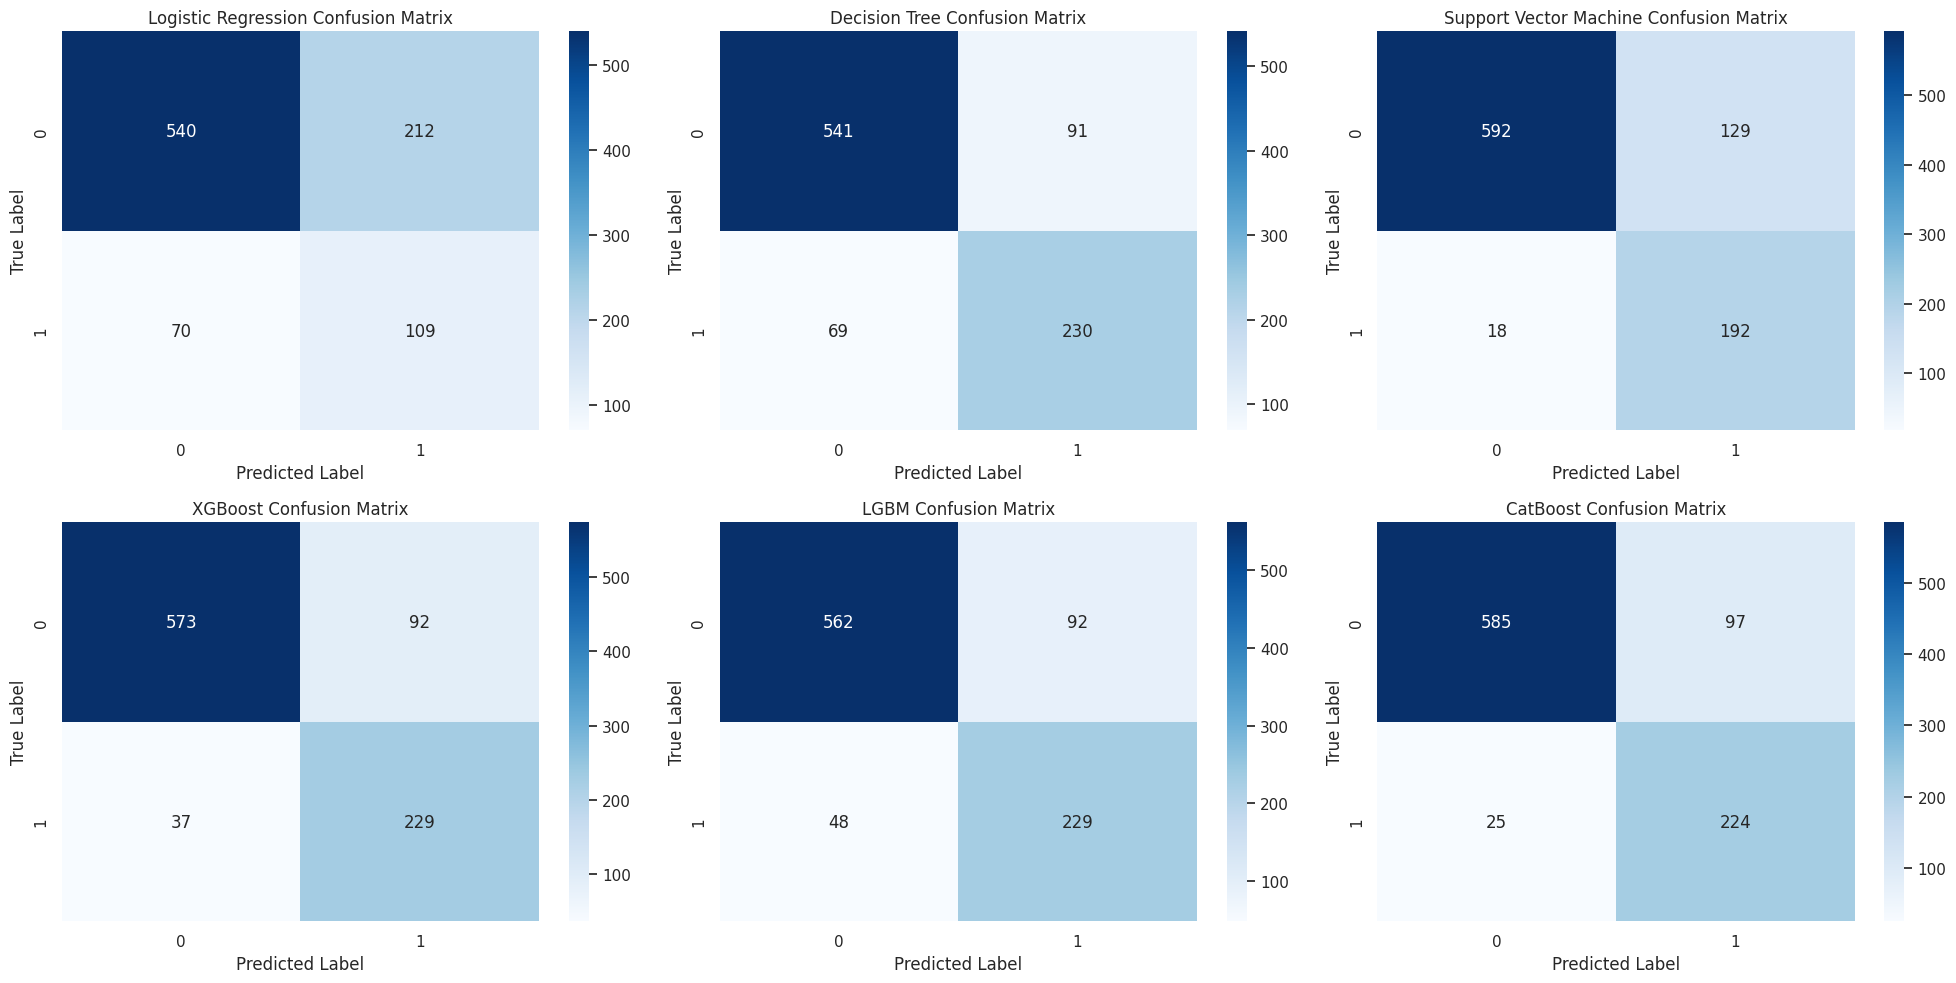

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       752
           1       0.34      0.61      0.44       179

    accuracy                           0.70       931
   macro avg       0.61      0.66      0.61       931
weighted avg       0.78      0.70      0.72       931

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       632
           1       0.72      0.77      0.74       299

    accuracy                           0.83       931
   macro avg       0.80      0.81      0.81       931
weighted avg       0.83      0.83      0.83       931

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       721
           1       0.60      0.91      0.72       210

    accuracy                           0.84       931
  

In [12]:
# Place all models in dictionary
models = {'Logistic Regression' : LogisticRegression(),
          'Decision Tree' : DecisionTreeClassifier(random_state=42),
          'Support Vector Machine' : svm.SVC(random_state=42),
          'XGBoost' : xgb.XGBClassifier(objective='binary:logistic', random_state=42),
          'LGBM' : lgb.LGBMClassifier(objective='binary', verbose=-1, random_state=42),
          'CatBoost' : CatBoostClassifier(verbose=0, random_state=42)}

# Create list variabel to store all models score
accuracy_scores = []
conf_matrix_scores = []
class_reports = []

# Train models and get scores each models
for model_ml in models.values():
  model = model_ml
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_pred, y_test)
  conf_matrix = confusion_matrix(y_pred, y_test)
  class_report = classification_report(y_pred, y_test)

  accuracy_scores.append(accuracy)
  conf_matrix_scores.append(conf_matrix)
  class_reports.append(class_report)

# Print all models accuracy
for i, name_model in enumerate(models.keys()):
  print(f'{name_model} Accuracy Score : {accuracy_scores[i]}')

# Create subplots to show confusion matrix each models
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, name_model in enumerate(models.keys()):
  row = i // 3
  col_position = i % 3
  sns.heatmap(conf_matrix_scores[i], annot=True, fmt="d", cmap="Blues", ax=axes[row, col_position])
  axes[row, col_position].set_xlabel("Predicted Label")
  axes[row, col_position].set_ylabel("True Label")
  axes[row, col_position].set_title(f'{name_model} Confusion Matrix')

plt.tight_layout()
plt.show()

# Print all classification report
for i, name_model in enumerate(models.keys()):
  print(f'{name_model} Classification Report:')
  print(class_reports[i])

Based on the accuracy model, the CatBoost model achieved the highest score, while the Logistic Regression model scored the lowest. This result suggests that a boosting algorithm, especially the CatBoost algorithm, is the best solution, as the dataset contains many categorical features. The Logistic Regression model, on the other hand, is not suitable for this case because there is no linear relationship between the features and the target variable.

Next, we performed a simple tuning for each model except the Logistic Regression model. The tuning values were selected randomly within specified intervals.

In [13]:
tree_param_grid = {
    'max_depth' : [3, 5, 10, 15, 20, None],
    'min_samples_split' : [2, 5, 10, 20],
    'min_samples_leaf' : [1, 5, 10, 20],
    'max_features' : ['sqrt', 'log2', None],
    'criterion' : ['gini', 'entropy']
}

svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'coef0': [0, 0.1, 0.5]
}

xgb_param_grid = {
    'n_estimators' : [100, 300, 500, 1000],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'max_depth' : [3, 5, 7, 10],
    'min_child_weight' : [1, 5, 10],
    'gamma' : [0, 0.1, 0.3, 0.5, 1],
    'subsample' : [0.6, 0.8, 1.0],
    'colsample_bytree' : [0.6, 0.8, 1.0],
    'reg_alpha' : [0, 0.01, 0.1, 1],
    'reg_lambda' : [1, 5, 10]
}

lgbm_param_grid = {
    'num_leaves' : [15, 31, 63, 127],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'n_estimators' : [100, 500, 1000],
    'max_depth' : [3, 5, 7, 10, -1],
    'min_data_in_leaf' : [20, 50, 100],
    'bagging_fraction' : [0.6, 0.8, 1.0],
    'feature_fraction' : [0.6, 0.8, 1.0],
    'lambda_l1' : [0, 0.1, 1, 10],
    'lambda_l2' : [0, 0.1, 1, 10]
}

catboost_param_grid = {
    'iterations' : [200, 500, 1000],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'depth' : [4, 6, 8, 10],
    'l2_leaf_reg' : [3, 10, 50, 100],
    'random_strength' : [1, 10, 50],
    'bagging_temperature' : [0, 0.5, 1, 2],
    'border_count' : [32, 64, 128]
}

param_grid = [tree_param_grid, svm_param_grid, xgb_param_grid, lgbm_param_grid, catboost_param_grid]

models = {
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Support Vector Machine' : svm.SVC(random_state=42),
    'XGBoost' : xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    'LGBM' : lgb.LGBMClassifier(objective='binary', verbose=-1, random_state=42),
    'CatBoost' : CatBoostClassifier(verbose=0, random_state=42)
}

for i, (key, value) in enumerate (models.items()):
  if i < 2:
    grid_search = GridSearchCV(estimator=value, param_grid=param_grid[i], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"{key} best parameters: {grid_search.best_params_}")
    print(f"{key} best cross-validation score: {grid_search.best_score_}")
  else:
    random_search = RandomizedSearchCV(estimator=value, param_distributions=param_grid[i], n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    print(f"{key} best parameters: {random_search.best_params_}")
    print(f"{key} best cross-validation score: {random_search.best_score_}")

Decision Tree best parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
Decision Tree best cross-validation score: 0.8398693800967021
Support Vector Machine best parameters: {'C': 10, 'coef0': 0, 'gamma': 0.1}
Support Vector Machine best cross-validation score: 0.8377217290899907
XGBoost best parameters: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0.01, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.8}
XGBoost best cross-validation score: 0.8508858338745761
LGBM best parameters: {'num_leaves': 31, 'n_estimators': 100, 'min_data_in_leaf': 20, 'max_depth': -1, 'learning_rate': 0.1, 'lambda_l2': 0, 'lambda_l1': 1, 'feature_fraction': 0.6, 'bagging_fraction': 0.6}
LGBM best cross-validation score: 0.8355697481417333
CatBoost best parameters: {'random_strength': 1, 'learning_rate': 0.05, 'l2_leaf_reg': 100, 'iterations': 200, 'depth': 10, 'border_c

After obtaining the best tuning values, we applied them to each model's parameters. Post-tuning, the accuracy scores improved for almost every model.

Logistic Regression Accuracy Score : 0.6970998925886144
Decision Tree Accuracy Score : 0.8657357679914071
Support Vector Machine Accuracy Score : 0.8592910848549946
XGBoost Accuracy Score : 0.8732545649838883
LGBM Accuracy Score : 0.849624060150376
CatBoost Accuracy Score : 0.8721804511278195


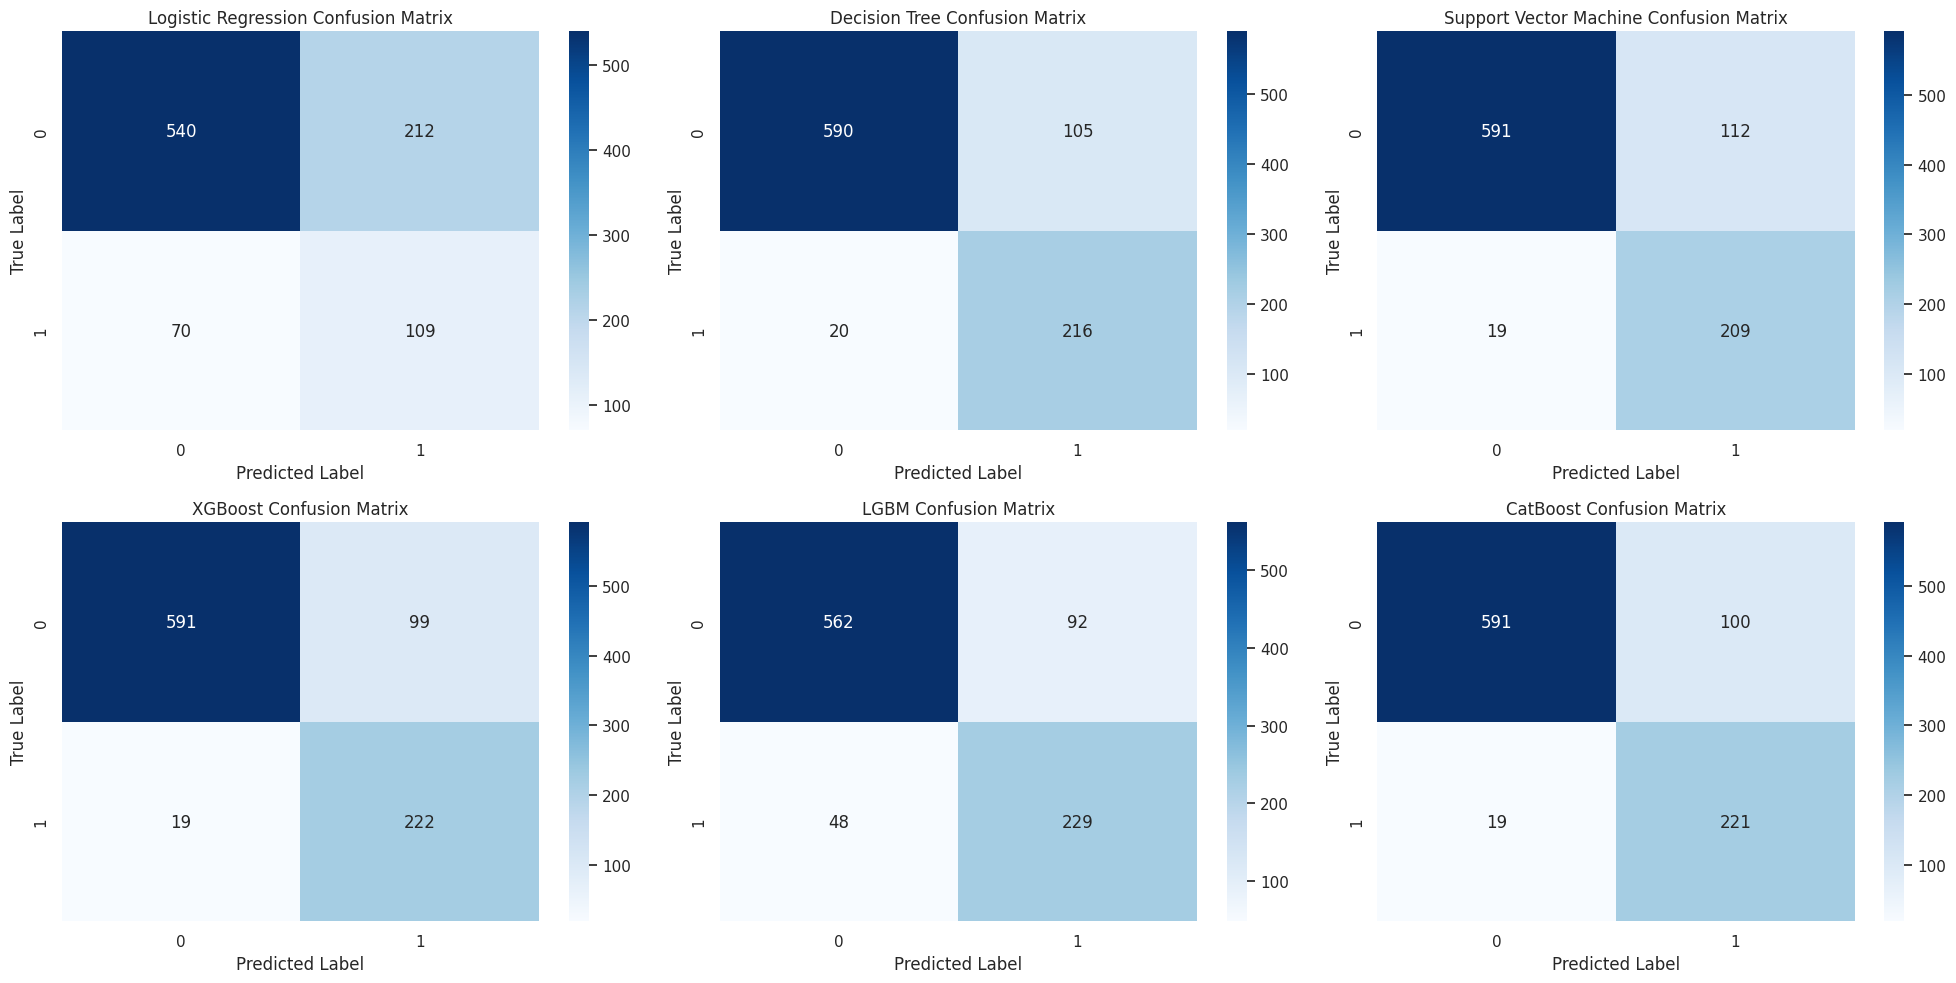

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       752
           1       0.34      0.61      0.44       179

    accuracy                           0.70       931
   macro avg       0.61      0.66      0.61       931
weighted avg       0.78      0.70      0.72       931

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.90       695
           1       0.67      0.92      0.78       236

    accuracy                           0.87       931
   macro avg       0.82      0.88      0.84       931
weighted avg       0.89      0.87      0.87       931

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       703
           1       0.65      0.92      0.76       228

    accuracy                           0.86       931
  

In [14]:
models = {'Logistic Regression' : LogisticRegression(),
          'Decision Tree' : DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=None,
                                                   min_samples_leaf=10, min_samples_split=2, random_state=42),
          'Support Vector Machine' : svm.SVC(C=10, coef0=0, gamma=0.1, random_state=42),
          'XGBoost' : xgb.XGBClassifier(objective='binary:logistic', subsample=1.0, reg_lambda=10, reg_alpha=0.01,
                                        n_estimators=1000, min_child_weight=1, max_depth=7, learning_rate=0.05,
                                        gamma=1, colsample_bytree=0.8, random_state=42),
          'LGBM' : lgb.LGBMClassifier(objective='binary', num_leaves=31, n_estimators=100, min_data_in_leaf=20,
                                      max_depth=-1, learning_rate=0.1, lambda_l2=0, lambda_l1=1, feature_fraction=0.6,
                                      bagging_fraction=0.6, verbose=-1, random_state=42),
          'CatBoost' : CatBoostClassifier(random_strength=1, learning_rate=0.05, l2_leaf_reg=100, iterations=200,
                                          depth=10, border_count=64, bagging_temperature=2, verbose=0, random_state=42)}

accuracy_scores = []
conf_matrix_scores = []
class_reports = []

for model_ml in models.values():
  model = model_ml
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_pred, y_test)
  conf_matrix = confusion_matrix(y_pred, y_test)
  class_report = classification_report(y_pred, y_test)

  accuracy_scores.append(accuracy)
  conf_matrix_scores.append(conf_matrix)
  class_reports.append(class_report)

for i, name_model in enumerate(models.keys()):
  print(f'{name_model} Accuracy Score : {accuracy_scores[i]}')

fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, name_model in enumerate(models.keys()):
  row = i // 3
  col_position = i % 3
  sns.heatmap(conf_matrix_scores[i], annot=True, fmt="d", cmap="Blues", ax=axes[row, col_position])
  axes[row, col_position].set_xlabel("Predicted Label")
  axes[row, col_position].set_ylabel("True Label")
  axes[row, col_position].set_title(f'{name_model} Confusion Matrix')

plt.tight_layout()
plt.show()

for i, name_model in enumerate(models.keys()):
  print(f'{name_model} Classification Report:')
  print(class_reports[i])

The model with the highest accuracy score after tuning was the XGBoost model, with a small difference from the CatBoost model. Among the models, the Decision Tree showed the largest improvement in accuracy after tuning.